### Are there any age or gender or topic based correlations by location in the posts? `(Todd)`

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

In [2]:
df = pd.read_csv('../Datasets/Master_Dataset_GeoTopic.csv')

# set the width of the 'Narrative' column to 100 characters
pd.options.display.max_colwidth = 100

In [5]:
df.columns

Index(['Unnamed: 0', 'Story Primary ID', 'Story ID', 'User Primary ID',
       'User ID', 'Gender', 'Age', 'Title', 'Narrative', 'Media',
       'Account Created Date', 'Date (No Timestamp)', 'Interest',
       'Narrative LangDetect', 'Narrative TikaDetect', 'Clean Narrative',
       'translated_text', 'GeoTopic Name', 'GeoTopic Latitude',
       'GeoTopic Longitude'],
      dtype='object')

In [3]:
# replace df with your original DataFrame
df = df.loc[:, ["Gender", "Age", "Interest", "GeoTopic Name"]]

In [4]:
# df.sample(20)[['Narrative', 'GeoTopic Name', 'GeoTopic Latitude', 'GeoTopic Longitude']]
df.sample(10)

,Gender,Age,Interest,GeoTopic Name
26985,male,21,"venezia, biennale di venezia",Venice
20064,male,12,covid-19,NaN
55171,NaN,25,culture,Victoria
80512,NaN,19,"Technology, History, Food, Entertainment, Sports, Environment, Science, Inequality, Education, H...",NaN
41330,NaN,12,Politics,United States
27265,NaN,49,"music, machine gun kelly, dolce & gabbana, dolce &, fashion, cinema, hollywood",Hollywood
14244,others,125,"Sports, juventus, football",NaN
67221,NaN,19,nature photography,NaN
15640,male,45,"coloraid, riqualificazione",Milan
10003,female,22,"save afghan women, free afghanistan",Kabul


In [5]:
# df = df.rename(columns={'GeoTopic Name': 'Location'})
df['Gender'] = df['Gender'].astype(str)
df['Age'] = df['Age'].astype(int)
df['Interest'] = df['Interest'].astype(str)
df['GeoTopic Name'] = df['GeoTopic Name'].astype(str)

In [ ]:
# Replace negative values with their absolute value
df['Age'] = np.abs(df['Age'])

# Replace values greater than 80 with 80
df['Age'] = np.where(df['Age'] > 80, 80, df['Age'])

In [6]:
df_AgeLocation = df.loc[:, ["Age", "GeoTopic Name"]]
df_GenderLocation = df.loc[:, ["Gender", "GeoTopic Name"]]
df_InterestLocation = df.loc[:, ["Interest", "GeoTopic Name"]]

In [7]:
# Create Smaller more-workable samples:
df_AgeLocation = df_AgeLocation.iloc[:1000]
df_GenderLocation = df_GenderLocation.iloc[:1000]
df_InterestLocation = df_InterestLocation.iloc[:1000]

### Correlations
Age vs Location
- 
Gender vs Location
- Pie Charts
    - Male Pie Chart
    - Female Pie CHart
Interest vs Location
- 


# Age vs Location

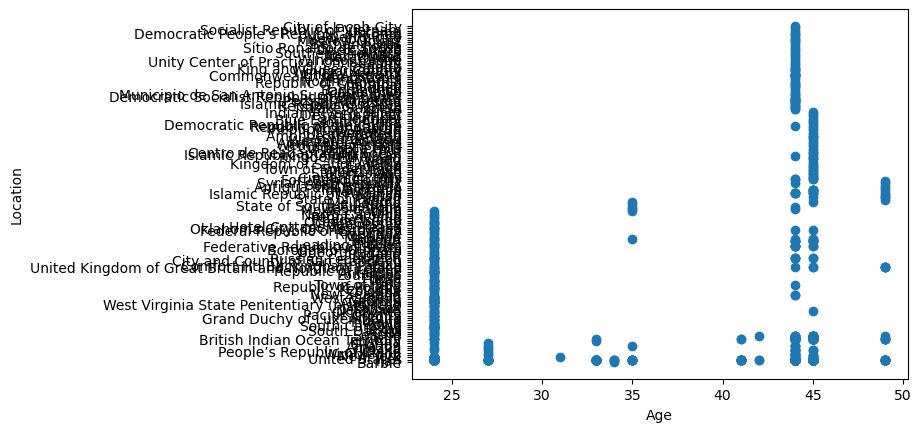

In [8]:
# plot the scatter plot
plt.scatter(df_AgeLocation['Age'], df_AgeLocation['GeoTopic Name'])
plt.xlabel('Age')
plt.ylabel('Location')
plt.show()

In [ ]:
# create a pivot table
pivot_table = df_AgeLocation.pivot_table(index='Age', columns='GeoTopic Name', aggfunc=len, fill_value=0)

fig, ax = plt.subplots(figsize=(20, 16))
# create a logarithmic color scale
norm = LogNorm(vmin=pivot_table.min().min(), vmax=pivot_table.max().max())
# create the heatmap
sns.heatmap(pivot_table, annot=True, cmap='RdBu', norm=norm)
plt.show()

In [13]:
# create a pivot table
pivot_table = df_AgeLocation.pivot_table(index='Age', columns='GeoTopic Name', aggfunc=len, fill_value=0)

# create a heatmap
# sns.heatmap(pivot_table, annot=True, cmap='Blues')
# sns.heatmap(pivot_table, annot=True, cmap='Blues', vmin=1, vmax=pivot_table.values.max())
# create a heatmap with blue to red color scheme
fig, ax = plt.subplots(figsize=(20, 16))
# sns.heatmap(pivot_table, annot=True, cmap='RdBu', vmin=1, vmax=pivot_table.values.max())
# plt.show()
# create a logarithmic color scale
norm = LogNorm(vmin=pivot_table.min().min(), vmax=pivot_table.max().max())
# create the heatmap
sns.heatmap(pivot_table, annot=True, cmap='RdBu', norm=norm)
plt.show()

ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 2000x1600 with 2 Axes>

KeyboardInterrupt: 

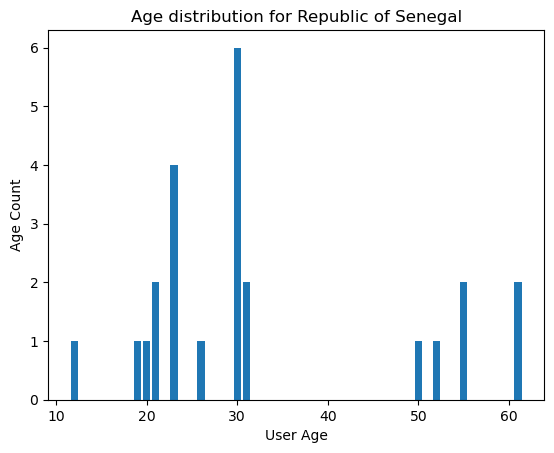

In [13]:
# Individual GeoTopic Location Bar Graphs

# Loop through each GeoTopic Name
for geo in df_AgeLocation['GeoTopic Name'].unique():
    # Get the age counts for this GeoTopic Name
    age_counts = df[df['GeoTopic Name'] == geo]['Age'].value_counts().sort_index()

    # Create a bar chart using matplotlib
    fig, ax = plt.subplots()
    ax.bar(age_counts.index, age_counts.values)

    # Set the chart title and axes labels
    ax.set_title('Age distribution for ' + geo)
    ax.set_xlabel('User Age')
    ax.set_ylabel('Age Count')

    # Save the chart as a PNG image
    fig.savefig('q1_figures/' + geo + '.png')

    # Close the figure to free up memory
    plt.close(fig)

In [ ]:
# Overlapping Bar Graphs

# Get a list of unique GeoTopic Names
geos = df['GeoTopic Name'].unique()

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Loop through each GeoTopic Name
for i, geo in enumerate(geos):
    # Get the age counts for this GeoTopic Name
    age_counts = df[df['GeoTopic Name'] == geo]['Age']

    # Filter the data to exclude any ages greater than 80
    age_counts = age_counts[age_counts <= 80]

    # Calculate the mean and standard deviation for this GeoTopic Name
    mean = age_counts.mean()
    std = age_counts.std()

    # Filter the data to exclude any points more than 2 standard deviations away from the mean
    age_counts_filtered = age_counts[(age_counts >= mean - 2*std) & (age_counts <= mean + 2*std)]

    # Set the bar width
    width = 0.35

    # Set the x position of the bars
    x_pos = i * width

    # Create a bar chart using matplotlib
    ax.bar(age_counts_filtered.unique() + x_pos, age_counts_filtered.value_counts(), width, label=geo)

# Set the chart title and axes labels
ax.set_title('Age distributions for multiple countries')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Set the x-ticks and x-tick labels
ax.set_xticks(df['Age'].unique())
ax.set_xticklabels(df['Age'].unique())

# Set the x-axis limits
ax.set_xlim(0, 80)

# Add a legend to the chart
ax.legend()

# Save the chart as a PNG image
fig.savefig('q1_figures/multiple_countries_filtered.png')

# Close the figure to free up memory
plt.close(fig)

# Gender vs Location

# Interest vs Location